## 3. 배후지: 상권이 매력적인가?
**배경**:
> 1인가구 증가에 따라 배달수요가 크게 확산되었으며 소비 만족도 극대화를 위해 지출을 아끼지 않는 패턴을 보여주고 있습니다.  

**목적**: 
> 1) 서울시 자치구별 1인 가구의 비율을 살펴보고 배달건수와 비교해보자  

**활용데이터**: 
> "2020년도 서울시 1인가구 비율", ""

### 00. Package Load

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings("ignore")
import time

import seaborn as sns

### 01. Data Path

In [2]:
kt_data_path = r'/Users/lion_oh/Desktop/hr/project/경진대회/교통데이터 공모전/code/dataset/kt_dataset/'
covid19_path = r'/Users/lion_oh/Desktop/hr/project/경진대회/교통데이터 공모전/code/dataset/covid_19_dataset/'
pop_path = r'/Users/lion_oh/Desktop/hr/project/경진대회/교통데이터 공모전/code/dataset/pop_dataset/'

In [3]:
kt_file_list = os.listdir(kt_data_path)
display(kt_file_list)

covid_file_list = os.listdir(covid19_path)
display(covid_file_list)

pop_file_list = os.listdir(pop_path)
display(pop_file_list)

['서울시_직장인구.csv',
 'StartupOrClosing_Shop.csv',
 '서울시_동별_1인가구.txt',
 'dlvr_call.csv',
 'StartupOrClosing_Region.csv',
 '전체 데이터 설명.hwp',
 'popl.csv']

['SeoulFloating.csv',
 'TimeAge.csv',
 'SearchTrend.csv',
 'TimeProvince.csv',
 'Weather.csv',
 'PatientInfo.csv',
 'Region.csv',
 'TimeGender.csv',
 'Policy.csv',
 'Case.csv',
 'Time.csv']

['2021_연령별 인구현황_1_6.csv',
 '.DS_Store',
 '주민등록 인구 및 세대현황.csv',
 '2020_연령별 인구현황_1_6.csv',
 '서울시_직장인구.csv',
 'pop_table.csv',
 '서울시_동별_1인가구.txt',
 '2020_서울시_1인가구비율.csv',
 '2020_연령별 인구현황_7_12.csv',
 '2021_연령별 인구현황_7.csv',
 'pop_2.csv',
 'pop_MZ.csv',
 'popl.csv',
 'pop_age.csv']

### 02. Data Load

#### 서울시 1인가구 비율 데이터
> - 파일명: 2020_서울시_1인가구비율.csv  
> - 출처: 통계청  
> - 설명: 서울시 자치구별 1인가구비율, 1인가구 수, 일반가구 수 데이터. (1인가구비율 = 1인가구 수 / 일반가구 수 * 100)  
> - 시기: 2020년도

In [4]:
pop_one = pd.read_csv(pop_path + '2020_서울시_1인가구비율.csv', encoding = 'cp949', names = ['자치구', '2020_1인가구_비율', '2020_1인가구', '2020_일반가구']).iloc[3:]
pop_one.head()

,자치구,2020_1인가구_비율,2020_1인가구,2020_일반가구
3,종로구,41.0,25983,63414
4,중구,41.4,22818,55093
5,용산구,38.5,36881,95714
6,성동구,34.9,42585,122186
7,광진구,41.0,62301,152090


* 데이터 타입을 변환해줄 필요가 보입니다

In [5]:
pop_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 3 to 27
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           25 non-null     object
 1   2020_1인가구_비율  25 non-null     object
 2   2020_1인가구     25 non-null     object
 3   2020_일반가구     25 non-null     object
dtypes: object(4)
memory usage: 932.0+ bytes


#### 서울시 자치구별 주민등록 인구 및 세대현황
> - 파일명: 주민등록 인구 및 세대현황.csv  
> - 출처: 통계청  
> - 설명: 서울시 자치구 월별 **주민등록인구 수**, **세대 수**, **세대당 인구 수**, **남/여 인구 수**. 
> - 시기: 2020년도

In [6]:
pop_total = pd.read_csv(pop_path + '주민등록 인구 및 세대현황.csv', encoding = 'cp949')
pop_total.head()

,행정구역,자치구,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,...,2021년06월_세대당 인구,2021년06월_남자 인구수,2021년06월_여자 인구수,2021년06월_남여 비율,2021년07월_총인구수,2021년07월_세대수,2021년07월_세대당 인구,2021년07월_남자 인구수,2021년07월_여자 인구수,2021년07월_남여 비율
0,서울특별시,종로구,"151,215","73,925",2.05,"73,688","77,527",0.95,"151,309","74,028",...,1.99,"70,985","75,044",0.95,"145,692","73,453",1.98,"70,810","74,882",0.95
1,서울특별시,중구,"126,201","62,814",2.01,"61,946","64,255",0.96,"126,259","63,016",...,1.96,"60,019","62,997",0.95,"122,951","63,001",1.95,"59,945","63,006",0.95
2,서울특별시,용산구,"229,385","110,457",2.08,"110,701","118,684",0.93,"229,677","110,770",...,2.03,"108,948","117,430",0.93,"225,977","111,635",2.02,"108,709","117,268",0.93
3,서울특별시,성동구,"300,410","135,732",2.21,"147,020","153,390",0.96,"299,797","135,797",...,2.15,"141,042","148,120",0.95,"288,703","134,493",2.15,"140,811","147,892",0.95
4,서울특별시,광진구,"351,263","164,730",2.13,"170,164","181,099",0.94,"351,032","165,100",...,2.05,"165,233","177,248",0.93,"342,111","167,057",2.05,"165,039","177,072",0.93


* 데이터 타입 변환 작업이 필요해 보입니다. 

#### 서울시 자치구별 인구 연령대
> - 파일명: pop_2.csv  
> - 출처: 통계청  
> - 설명: 서울시 자치구 **연령대별 총인구 수**   
> - 시기: 2018 ~ 2020

In [7]:
pop_age = pd.read_csv(pop_path + 'pop_2.csv', encoding = 'cp949', header = 1, names = ['자치구', '연령별', '2018총인구(명)', '2019총인구(명)', '2020총인구(명)'])
pop_age.head()

,자치구,연령별,2018총인구(명),2019총인구(명),2020총인구(명)
0,종로구,0~4세,3870,3565,3130
1,종로구,5~9세,4468,4372,4217
2,종로구,10~14세,4863,4740,4721
3,종로구,15~19세,9887,9015,7656
4,종로구,20~24세,15995,15242,14111


* 연령별 카테고리가 세분화 되어 있습니다. 분석에 앞서 이를 묶어주는 작업이 필요해 보입니다

#### 서울시 자치구별 MZ세대와 주택형태
> - 파일명: pop_table.csv  
> - 출처: 통계청 & 전처리  
> - 설명: 서울시 자치구별 **MZ인구 수**, **주택형태 수** 
> - 시기: 2018 ~ 2020

In [8]:
pop_mz = pd.read_csv(pop_path + 'pop_table.csv').rename(columns = {'Unnamed: 0':'자치구'})
pop_mz.head()

,자치구,총인구2018,총인구2019,총인구2020,MZ인구2018,MZ인구2019,MZ인구2020,일인가구2018,일인가구2019,일인가구2020,전체가구2018,전체가구2019,전체가구2020,미니주택2018,미니주택2019,미니주택2020,큰주택2018,큰주택2019,큰주택2020
0,강남구,507775,509152,508085,181422,178256,175052,62727,66073,68999,493298,493492,494125,19656,20442,21598,162356,161455,165040
1,강동구,414198,415244,444377,140644,138656,147191,42126,45188,50316,402479,403443,432784,17349,17051,17636,111134,111671,126835
2,강북구,309111,303851,299512,99635,95980,92794,40872,42791,45685,299415,294143,290437,20507,20365,20096,75834,77983,78853
3,강서구,578503,574057,564816,212416,208603,203577,73011,79371,86172,563772,559359,551415,33420,35689,38396,178677,181947,183987
4,관악구,510265,507792,502603,220957,220592,219113,112733,119863,129233,475013,472796,470469,38220,38745,38945,101631,103046,104405


### 03. Data Preprocessing

* 시각화를 위해 변수 타입을 알맞게 변환해주자

In [9]:
# 서울시 자치구별 1인가구 비율에서...
pop_one['2020_1인가구_비율'] = pop_one['2020_1인가구_비율'].astype(np.float)
pop_one['2020_1인가구'] = pop_one['2020_1인가구'].astype(np.float)
pop_one['2020_일반가구'] = pop_one['2020_일반가구'].astype(np.float)

# 서울시 자치구별 주민등록인구 수 및 세대현황에서...
## 자리숫 표시를 위해 사용된 ',' 제거 후 변수타입 변환해주자
## 제공받은 배달 데이터가 2020년 6월까지 이므로, 2020년 6월에 조사된 총인구수를 사용합니다.
pop_total['2020년06월_총인구수'] = pop_total['2020년06월_총인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_세대수'] = pop_total['2020년06월_세대수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_남자 인구수'] = pop_total['2020년06월_남자 인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_여자 인구수'] = pop_total['2020년06월_여자 인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)

* 연령대 카테고리가 좀 세분화되어 있네요...묶어봅시다!!

In [10]:
age_g = {
 '0~4세' : '10세미만',
 '5~9세' : '10세미만',
 '10~14세' : '10대',
 '15~19세' : '10대',
 '20~24세' : '20대',
 '25~29세' : '20대',
 '30~34세' : '30대',
 '35~39세' : '30대',
 '40~44세' : '40대',
 '45~49세' : '40대',
 '50~54세' : '50대',
 '55~59세' : '50대',
 '60~64세' : '60대',
 '65~69세' : '60대',
 '70~74세' : '70세 이상',
 '75~79세' : '70세 이상',
 '80~84세' : '70세 이상',
 '85~89세' : '70세 이상',
 '90~94세' : '70세 이상',
 '95~99세' : '70세 이상'}

def _get_ageg(age):
    '''
        연령별 카테고리를 연령대 군집하는 함수 정의
        age: 연령별, pop: 2020총인구(명)
    '''
    return age_g[age]

def _get_ratio(region, pop):
    '''
        자치구별 연령대 비율 함수 정의
        region: 자치구, pop: 인구 수
    '''
    global pop_age_region
    
    return round(pop / (pop_age_region[pop_age_region['자치구'] == region]['2020총인구(명)'].values[0]) * 100,1)

In [11]:
# 우선 연령대를 다시 라벨링 합니다.
pop_age['age_g'] = pop_age.apply(lambda x: _get_ageg(x['연령별']), axis = 1)

# 그리고 라벨링된 연령대와 자치구 기준으로 집계하여 자치구 및 연령대별 2020총인구를 구하고..
pop_age1 = pop_age.groupby(['자치구','age_g']).agg({'2020총인구(명)': np.sum}).reset_index()

# 각 연령대별 인구비율을 구하기위해 자치구별 2020총인구 수를 만들어 놓고..
pop_age_region = pop_age1.groupby('자치구').agg({'2020총인구(명)':np.sum}).reset_index()

# 최종적으로 인구비율 변수를 만들어줍니다.
pop_age1['연령대비율(%)'] = pop_age1.apply(lambda x: _get_ratio(x['자치구'], x['2020총인구(명)']), axis = 1)\

pop_age1

,자치구,age_g,2020총인구(명),연령대비율(%)
0,강남구,10대,54422,10.7
1,강남구,10세미만,34776,6.8
2,강남구,20대,69289,13.6
3,강남구,30대,78072,15.4
4,강남구,40대,92555,18.2
...,...,...,...,...
195,중랑구,30대,57788,15.0
196,중랑구,40대,56074,14.5
197,중랑구,50대,67548,17.5
198,중랑구,60대,56538,14.7


* 각 자치구별로 총인구 수가 다르기 때문에 비율로 비교하는게 좋을 것 같아요.

In [12]:
pop_total.head()

,행정구역,자치구,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,...,2021년06월_세대당 인구,2021년06월_남자 인구수,2021년06월_여자 인구수,2021년06월_남여 비율,2021년07월_총인구수,2021년07월_세대수,2021년07월_세대당 인구,2021년07월_남자 인구수,2021년07월_여자 인구수,2021년07월_남여 비율
0,서울특별시,종로구,"151,215","73,925",2.05,"73,688","77,527",0.95,"151,309","74,028",...,1.99,"70,985","75,044",0.95,"145,692","73,453",1.98,"70,810","74,882",0.95
1,서울특별시,중구,"126,201","62,814",2.01,"61,946","64,255",0.96,"126,259","63,016",...,1.96,"60,019","62,997",0.95,"122,951","63,001",1.95,"59,945","63,006",0.95
2,서울특별시,용산구,"229,385","110,457",2.08,"110,701","118,684",0.93,"229,677","110,770",...,2.03,"108,948","117,430",0.93,"225,977","111,635",2.02,"108,709","117,268",0.93
3,서울특별시,성동구,"300,410","135,732",2.21,"147,020","153,390",0.96,"299,797","135,797",...,2.15,"141,042","148,120",0.95,"288,703","134,493",2.15,"140,811","147,892",0.95
4,서울특별시,광진구,"351,263","164,730",2.13,"170,164","181,099",0.94,"351,032","165,100",...,2.05,"165,233","177,248",0.93,"342,111","167,057",2.05,"165,039","177,072",0.93


In [13]:
# 서울시 자치구별 남/여 비율
pop_gender = pop_total[['자치구', '2020년06월_총인구수', '2020년06월_남자 인구수', '2020년06월_여자 인구수']]
def _get_gen_ratio(total, male, female):
    '''
        자치구별 남/여 비율 구하는 함수 정의
        total: 전체 인구 수
        male: 남자 인구 수
        female: 여자 인구 수
    '''
    return pd.Series([round(male/total*100,1), round(female/total*100,1)])

pop_gender[['2020년6월_남자 비율', '2020년6월_여자 비율']] = pop_gender.apply(lambda x: _get_gen_ratio(x['2020년06월_총인구수'],x['2020년06월_남자 인구수'], x['2020년06월_여자 인구수']), axis = 1)
pop_gender.head()

,자치구,2020년06월_총인구수,2020년06월_남자 인구수,2020년06월_여자 인구수,2020년6월_남자 비율,2020년6월_여자 비율
0,종로구,150383.0,73288.0,77095.0,48.7,51.3
1,중구,126092.0,61697.0,64395.0,48.9,51.1
2,용산구,229431.0,110527.0,118904.0,48.2,51.8
3,성동구,297397.0,145258.0,152139.0,48.8,51.2
4,광진구,349574.0,168879.0,180695.0,48.3,51.7


In [14]:
# 서울시 자치구별 MZ세대 비율
pop_mz["MZ인구비율2020"] = pop_mz.apply(lambda x: round(x['MZ인구2020']/x['총인구2020']*100,1), axis = 1)
pop_mz["미니주택비율2020"] = pop_mz.apply(lambda x: round(x['미니주택2020']/(x['미니주택2020'] + x['큰주택2020'])*100,1), axis = 1)
pop_mz["큰주택비율2020"] = pop_mz.apply(lambda x: round(x['큰주택2020']/(x['미니주택2020'] + x['큰주택2020'])*100,1), axis = 1)
pop_mz.head()

,자치구,총인구2018,총인구2019,총인구2020,MZ인구2018,MZ인구2019,MZ인구2020,일인가구2018,일인가구2019,일인가구2020,...,전체가구2020,미니주택2018,미니주택2019,미니주택2020,큰주택2018,큰주택2019,큰주택2020,MZ인구비율2020,미니주택비율2020,큰주택비율2020
0,강남구,507775,509152,508085,181422,178256,175052,62727,66073,68999,...,494125,19656,20442,21598,162356,161455,165040,34.5,11.6,88.4
1,강동구,414198,415244,444377,140644,138656,147191,42126,45188,50316,...,432784,17349,17051,17636,111134,111671,126835,33.1,12.2,87.8
2,강북구,309111,303851,299512,99635,95980,92794,40872,42791,45685,...,290437,20507,20365,20096,75834,77983,78853,31.0,20.3,79.7
3,강서구,578503,574057,564816,212416,208603,203577,73011,79371,86172,...,551415,33420,35689,38396,178677,181947,183987,36.0,17.3,82.7
4,관악구,510265,507792,502603,220957,220592,219113,112733,119863,129233,...,470469,38220,38745,38945,101631,103046,104405,43.6,27.2,72.8


* 전처리가 끝난 각 데이터셋에서 시각화에 필요한 변수들만 모아보자

In [15]:
pop_total_f = pop_total[['자치구', '2020년06월_총인구수', '2020년06월_세대수', '2020년06월_세대당 인구']]
pop_one_f =  pop_one[['자치구', '2020_1인가구_비율', '2020_1인가구','2020_일반가구']]
pop_age1_f = pop_age1[['자치구', 'age_g', '연령대비율(%)']]
pop_gender_f = pop_gender[['자치구', '2020년6월_남자 비율', '2020년6월_여자 비율']]
pop_mz_f = pop_mz[['자치구', 'MZ인구2020', 'MZ인구비율2020', '미니주택비율2020', '큰주택비율2020']]

df = pop_total_f.merge(pop_one_f, on = '자치구', how = 'left')
df1 = df.merge(pop_age1_f, on = '자치구', how = 'left')
df2 = df1.merge(pop_gender_f, on = '자치구', how = 'left')
pop_final = df2.merge(pop_mz_f, on = '자치구', how = 'left')

In [16]:
# 최종 인구통계 데이터
pop_final

,자치구,2020년06월_총인구수,2020년06월_세대수,2020년06월_세대당 인구,2020_1인가구_비율,2020_1인가구,2020_일반가구,age_g,연령대비율(%),2020년6월_남자 비율,2020년6월_여자 비율,MZ인구2020,MZ인구비율2020,미니주택비율2020,큰주택비율2020
0,종로구,150383.0,74497.0,2.02,41.0,25983.0,63414.0,10대,8.2,48.7,51.3,56491,37.3,34.7,65.3
1,종로구,150383.0,74497.0,2.02,41.0,25983.0,63414.0,10세미만,4.9,48.7,51.3,56491,37.3,34.7,65.3
2,종로구,150383.0,74497.0,2.02,41.0,25983.0,63414.0,20대,18.6,48.7,51.3,56491,37.3,34.7,65.3
3,종로구,150383.0,74497.0,2.02,41.0,25983.0,63414.0,30대,13.7,48.7,51.3,56491,37.3,34.7,65.3
4,종로구,150383.0,74497.0,2.02,41.0,25983.0,63414.0,40대,14.3,48.7,51.3,56491,37.3,34.7,65.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,강동구,457164.0,193095.0,2.37,28.4,50316.0,177148.0,30대,15.7,49.3,50.7,147191,33.1,12.2,87.8
196,강동구,457164.0,193095.0,2.37,28.4,50316.0,177148.0,40대,16.0,49.3,50.7,147191,33.1,12.2,87.8
197,강동구,457164.0,193095.0,2.37,28.4,50316.0,177148.0,50대,15.9,49.3,50.7,147191,33.1,12.2,87.8
198,강동구,457164.0,193095.0,2.37,28.4,50316.0,177148.0,60대,13.9,49.3,50.7,147191,33.1,12.2,87.8


### 04. Data Investigation

#### Base Analysis

##### 서울시 자치구별 총인구 수
**주민등록인구 vs 생활인구**  
> 주민등록인구는 주민등록신고에 기반하여 작성한 통계이며 생활인구는 조사시점 현재 그 지역에 머무르고 있는 실제 인구를 뜻합니다.  
> 본 분석에서 자치구별 총인구 수를 기준으로 비율을 산출하기 때문에 변동성이 적은 주민등록인구를 사용합시다.

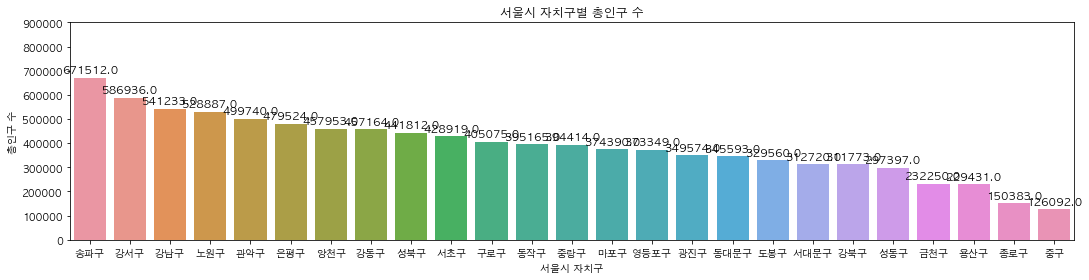

In [17]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_총인구수', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('총인구 수')
plt.title('서울시 자치구별 총인구 수')
plt.ylim(top = 900000)
plt.show()

* 기본적으로 자치구별 총인구 수를 비교합니다.  
* 송파구가 제일 인구 수가 많네요

##### 서울시 자치구별 세대 수 
**세대수란**  
> 주거 및 생계를 같이하는 집단

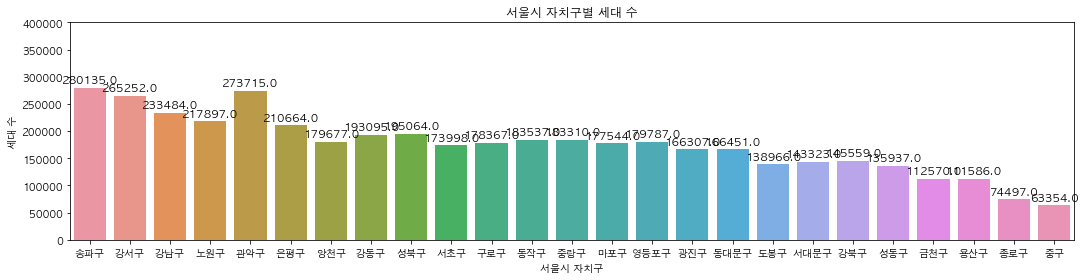

In [18]:
## 서울시 자치구별 세대 수
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_세대수', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('세대 수')
plt.title('서울시 자치구별 세대 수')
plt.ylim(top = 400000)
plt.show()

* 전반적으로 총인구 수가 낮을 수록 세대 수가 낮은 경향을 보이고 있습니다.  
* **관악구**의 경우는 조금 다르네요. 총인구 수 대비 세대가 많다는 것을 확인할 수 있습니다. 하지만, 자치구별로 총인구 수가 다르기 때문에 정확히 비교하기에는 어려움이 있네요... 
* 좀더 자세히 살펴보기 위해 **세대당 인구 수**를 확인해 볼 필요가 있겠습니다.

##### 서울시 자치구별 세대당 인구 수  
**세대당 인구 수**
> 세대당 인구 = 총인구 수 / 세대 수  

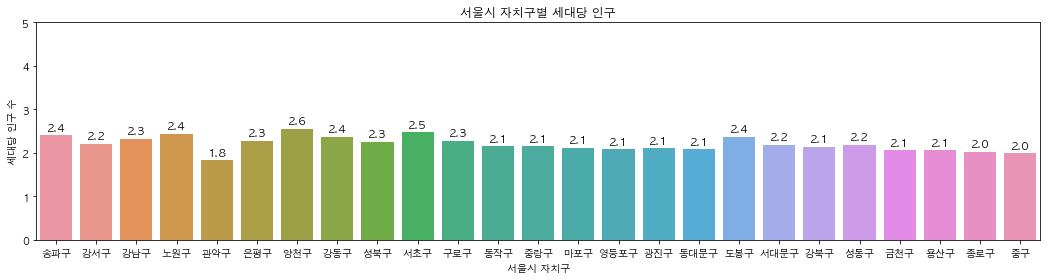

In [19]:
## 서울시 자치구별 세대 당 인구 수
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_세대당 인구', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('세대당 인구 수')
plt.title('서울시 자치구별 세대당 인구')
plt.ylim(top = 5)
plt.show()

* 확실히, **관악구**는 각 세대가 적은 수의 구성원으로 이루어져 있다는 것을 내포하는 것 같습니다.  
* 좀 더 자세히 확인해보기 위해 1인가구 수 비율도 같이 확인해보죠

##### 서울시 자치구별 1인가구 수

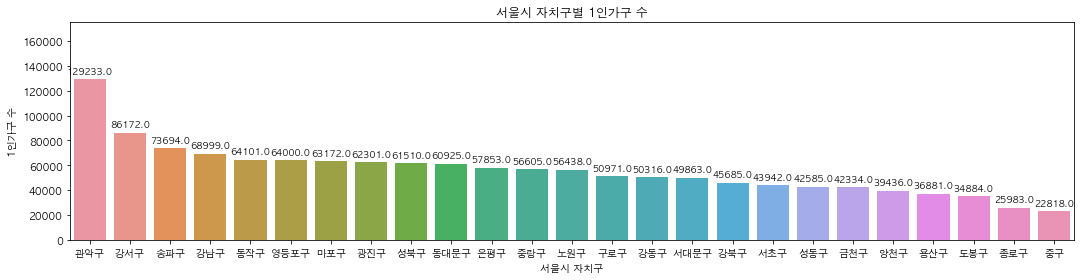

In [20]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020_1인가구', 
                    order = pop_final.groupby('자치구')['2020_1인가구'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('서울시 자치구')
plt.ylabel('1인가구 수')
plt.title('서울시 자치구별 1인가구 수')
plt.ylim(top = 175000)
plt.show()

* 서울시 자치구별 1인가구 수를 살펴보니, 관악구가 제일 많았습니다.
* 대학과 고시촌이 밀집해 있어서 학생과 수험생 수요가 많아 1인가구 수가 많아보입니다(출처: 서울경제TV)  
* 반면, 중구와 종로구는 관악구 절반에도 못 미치는 수치입니다.

##### 서울시 자치구별 일반가구 수
**일반가구란?**
> 1인 또는 2인 이상이 모여서 취사, 취침, 생계를 같이하는 단위인 가구중 외국인 가구와 집단가구(6인이상)를 제외한 가구

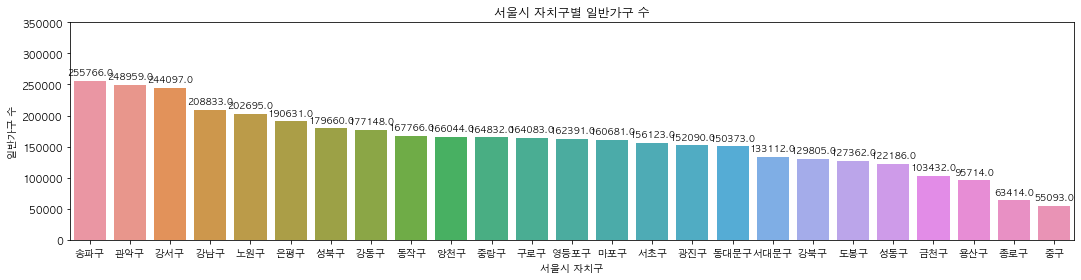

In [21]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020_일반가구', 
                    order = pop_final.groupby('자치구')['2020_일반가구'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('일반가구 수')
plt.title('서울시 자치구별 일반가구 수')
plt.ylim(top = 350000)
plt.show()

* 일반가구를 살펴보니 송파구가 가장 많은 것을 확인할 수 있습니다.  
* 중구와 종로구는 일반가구에서도 적은 수치를 보이고 있네요.  
* 배경에서 1인가구의 비율이 높아짐에 따라 배달 수요가 많아진다고 했으니, 1인가구 수 보다는 **1인가구 비율**로 분석해봅시다 

##### 서울시 자치구별 성별 비율

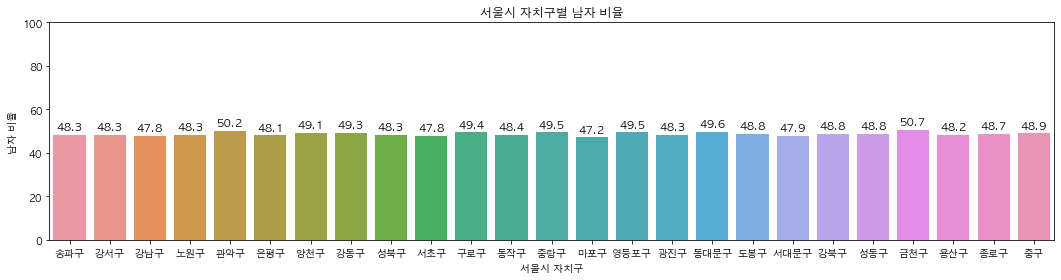

In [22]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년6월_남자 비율', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('남자 비율')
plt.title('서울시 자치구별 남자 비율')
plt.ylim(top = 100)
plt.show()

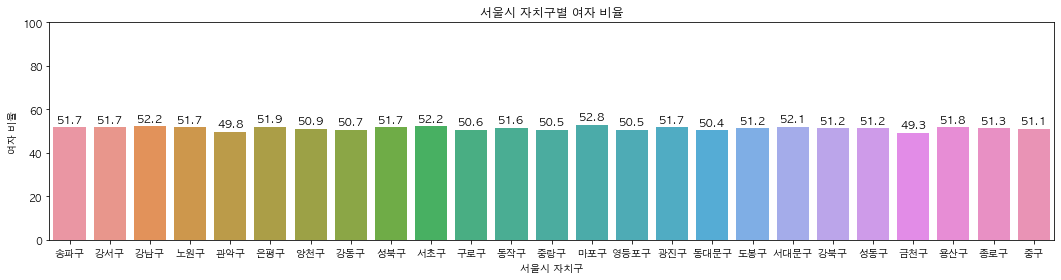

In [23]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년6월_여자 비율', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('여자 비율')
plt.title('서울시 자치구별 여자 비율')
plt.ylim(top = 100)
plt.show()

* 서울시 자치구별 성별 비율을 확인해본 결과, 전체적으로 여성의 비율이 다소 높은것을 확인할 수 있습니다. 

##### 서울시 자치구별 MZ인구 수
**MZ세대란**  
> 밀레니얼(Millennials)의 M과 제네레이션(Generation)의 Z가 합쳐진 말입니다. M세대는 1980년대 초부터 2000년대 초 출생한 세대로 정보기술(IT)에 능통하며 대학 진학률이 높다는 특징이 있습니다.  Z세대는 1990년대 중반 2000년대 초반 출생한 세대로 디지털 환경에서 자란’디지털 네이티브(디지털 원주민)’라는 특징이 있습니다.  
(출처: "MZ세대 제대로 알아보기", 생각의 힘)  

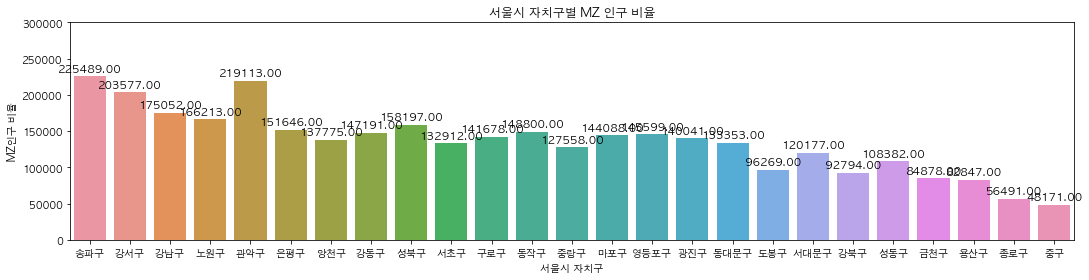

In [24]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = 'MZ인구2020', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('MZ인구 비율')
plt.title('서울시 자치구별 MZ 인구 비율')
plt.ylim(top = 300000)
plt.show()

* **송파구**, **관악구**, **강서구**에서 MZ세대가 많이 거주하고 있습니다.  
* 반면, "중구", "종로구"에서는 MZ세대가 적군요...  
* MZ인구 또한 자치구별 총인구 수 대비 비율로 확인하면 좋을 것 같습니다. 그리고 연령대 분포도 같이 확인해보죠

##### 서울시 자치구별 연령대 분포

In [25]:
pop_final.columns

Index(['자치구', '2020년06월_총인구수', '2020년06월_세대수', '2020년06월_세대당 인구',
       '2020_1인가구_비율', '2020_1인가구', '2020_일반가구', 'age_g', '연령대비율(%)',
       '2020년6월_남자 비율', '2020년6월_여자 비율', 'MZ인구2020', 'MZ인구비율2020',
       '미니주택비율2020', '큰주택비율2020'],
      dtype='object')

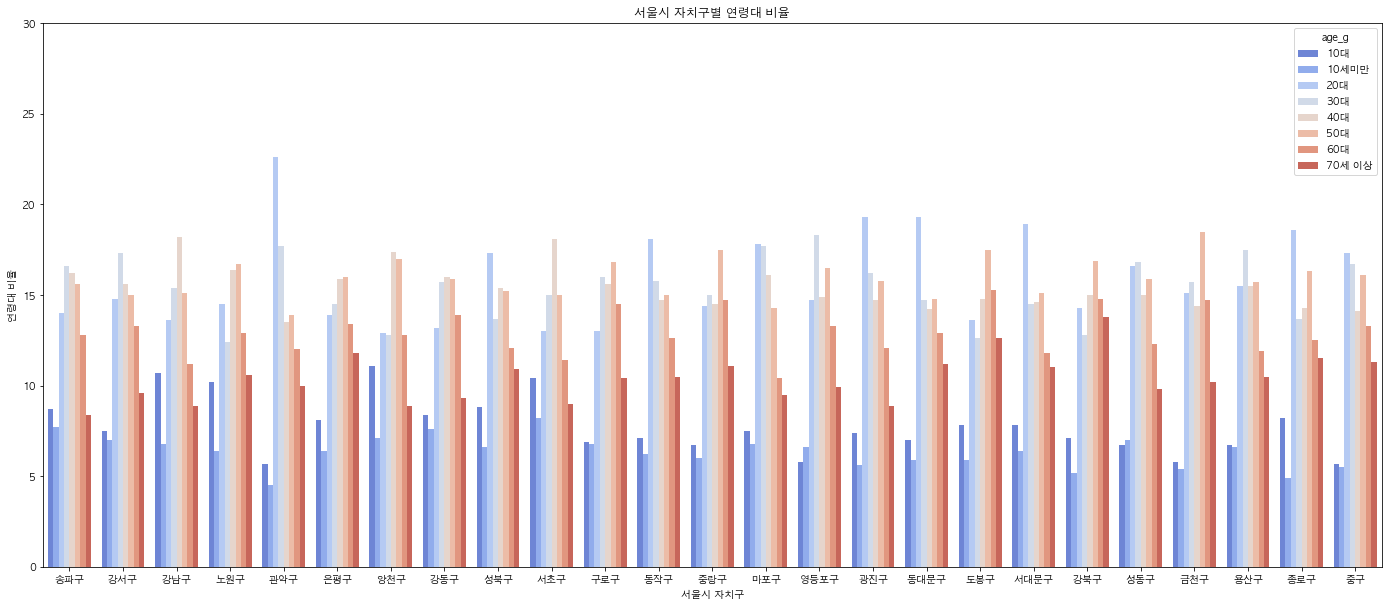

In [26]:
plt.figure(figsize=(24, 10))
plots = sns.barplot(data=pop_final, x='자치구', y='연령대비율(%)',hue='age_g', palette="coolwarm",
                   order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

plt.xlabel('서울시 자치구')
plt.ylabel('연령대 비율')
plt.title('서울시 자치구별 연령대 비율')
plt.ylim(top = 30)
plt.show()

#### Attractive of Hinterland(배후지 매력도)

In [27]:
# 배후지 매력도를 위한 테이블을 생성합니다.
## Score1: 1인가구 비율, Score2: MZ인구 비율
pop_score = pop_final.groupby('자치구').agg({'2020_1인가구_비율':max, 'MZ인구비율2020':max}).reset_index()
pop_score = pop_score.rename(columns = {'2020_1인가구_비율':'S1_1인가구비율', 'MZ인구비율2020':'S2_MZ비율'})
pop_score.head()

,자치구,S1_1인가구비율,S2_MZ비율
0,강남구,33.0,34.5
1,강동구,28.4,33.1
2,강북구,35.2,31.0
3,강서구,35.3,36.0
4,관악구,51.9,43.6


##### 1인가구비율
서울시 자치구별 총인구수 대비 1인가구 비율을 확인해봅시다

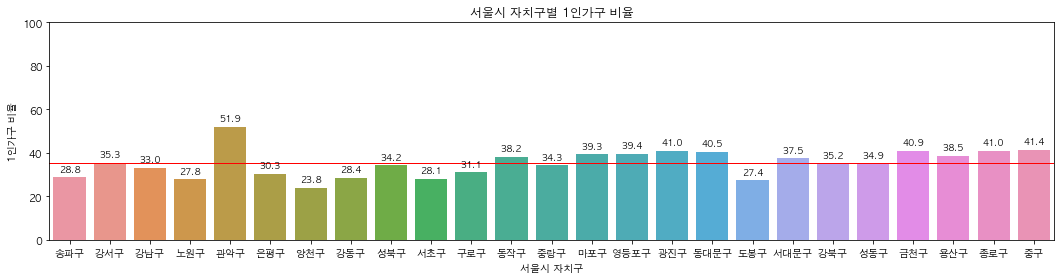

In [28]:
mean_y = pop_score['S1_1인가구비율'].mean()

plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_score, x = '자치구', y = 'S1_1인가구비율',
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.axhline(y = mean_y, color = 'r', linewidth = 1)
plt.xlabel('서울시 자치구')
plt.ylabel('1인가구 비율')
plt.title('서울시 자치구별 1인가구 비율')
plt.ylim(top = 100)
plt.show()

* "1인가구 수"와 같이 **관악구**에서 가장 높은 비율을 차지하는 것을 확인할 수 있습니다.  
* "1인가구 수" 기준으로 정렬했을 때, "1인가구 수"가 상대적으로 적었던 **종로구**, **중구**에서 높은 비율을 보이고 있네요?
* "1인가구"안에는 다양한 연령대가 분포에 있을 거고, 특히 독거노인등과 같은 취약계층은 배달 수요가 많지는 않을겁니다. 이처럼 "1인가구 비율"도 중요하지만 그 안에 연령대 분포를 확인하는것도 필요해 보이네요

In [29]:
## Z_score 정규화
pop_s1 = pop_score.copy()
S1_mean = pop_s1['S1_1인가구비율'].mean()
S1_std = pop_s1['S1_1인가구비율'].std()
pop_s1['S1_Z_score'] = pop_s1.apply(lambda x: (x['S1_1인가구비율'] - S1_mean) / S1_std, axis = 1)
pop_s1_T = pop_s1.transpose().rename(columns = pop_s1.transpose().iloc[0]).drop(pop_s1.transpose().index[0])
pop_s1_T

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
S1_1인가구비율,33.0,28.4,35.2,35.3,51.9,41.0,31.1,40.9,27.8,27.4,...,34.9,34.2,28.8,23.8,39.4,38.5,30.3,41.0,41.4,34.3
S2_MZ비율,34.5,33.1,31.0,36.0,43.6,39.6,32.5,34.0,32.5,30.5,...,37.1,36.1,35.1,31.4,36.1,36.7,32.7,37.3,37.4,33.1
S1_Z_score,-0.366497,-1.103336,-0.014096,0.001922,2.66095,0.914962,-0.670844,0.898944,-1.199446,-1.263519,...,-0.062151,-0.174278,-1.039263,-1.840175,0.65867,0.514506,-0.79899,0.914962,0.979035,-0.15826


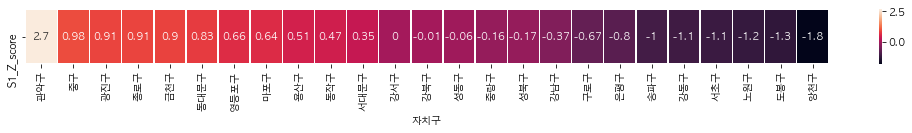

In [30]:
## 정규화된 서울시 자치구별 1인가구 비율
plt.figure(figsize=(18, 1))
sns.heatmap(pop_s1.set_index('자치구').loc[:,'S1_Z_score'].sort_values(ascending = False).to_frame().T.round(2), annot = True, linewidth = .5)
plt.show()

##### MZ세대 비율
서울시 자치구별 1인가구 비율 대비 MZ세대 비율을 확인해봅시다. 
> MZ인구 비율 = (MZ인구 수 / 총인구 수) * 100

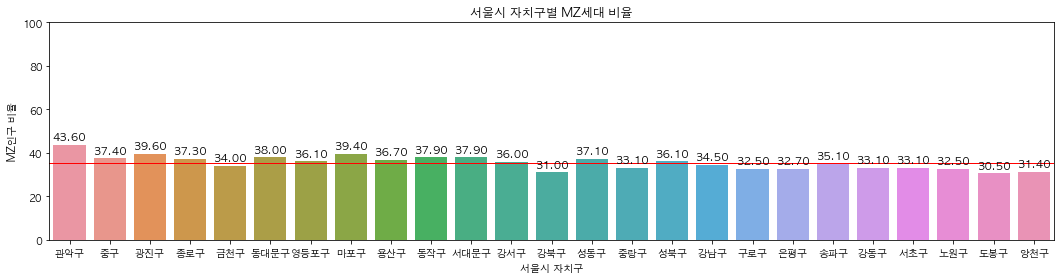

In [31]:
mean_y = pop_score['S2_MZ비율'].mean()

plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_score, x = '자치구', y = 'S2_MZ비율', 
                    order = pop_score.groupby('자치구')['S1_1인가구비율'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.axhline(y = mean_y, color = 'r', linewidth = 1)
plt.xlabel('서울시 자치구')
plt.ylabel('MZ인구 비율')
plt.title('서울시 자치구별 MZ세대 비율')
plt.ylim(top = 100)
plt.show()

* 총인구수 대비 자치구별 MZ세대 비율을 살펴본 결과, **관악구**에서 가장 높은 비율을 보이고 있습니다.  
* 관악구, 중구, 광진구, 종로구, 동대문구, 영등포구, 마포구, 용산구, 동작구, 서대문구, 강서구, 성동구, 성북구가 자치구 평균보다 높은 비율의 MZ세대를 보유하고 있습니다. 
* "마포구", "성동구", "성북구"는 1인 가구 비율에 비해 보다 높은 MZ세대 비율을 보유하고 있습니다. 즉, 젊은층 1인가구가 많이 거주하고 있다는 것을 확인할 수 있습니다.  

In [32]:
## Z_score 정규화
pop_s2 = pop_score.copy()
S2_mean = pop_s2['S2_MZ비율'].mean()
S2_std = pop_s2['S2_MZ비율'].std()
pop_s2['S2_Z_score'] = pop_s2.apply(lambda x: (x['S2_MZ비율'] - S2_mean) / S2_std, axis = 1)
pop_s2_T = pop_s2.transpose().rename(columns = pop_s2.transpose().iloc[0]).drop(pop_s2.transpose().index[0])
pop_s2_T

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
S1_1인가구비율,33.0,28.4,35.2,35.3,51.9,41.0,31.1,40.9,27.8,27.4,...,34.9,34.2,28.8,23.8,39.4,38.5,30.3,41.0,41.4,34.3
S2_MZ비율,34.5,33.1,31.0,36.0,43.6,39.6,32.5,34.0,32.5,30.5,...,37.1,36.1,35.1,31.4,36.1,36.7,32.7,37.3,37.4,33.1
S2_Z_score,-0.307561,-0.754227,-1.424225,0.171009,2.595765,1.319577,-0.945655,-0.467084,-0.945655,-1.583748,...,0.521961,0.202914,-0.116133,-1.296606,0.202914,0.394342,-0.881845,0.58577,0.617675,-0.754227


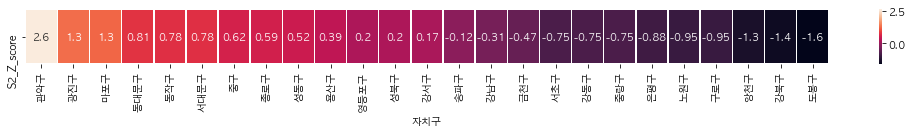

In [33]:
## 서울시 자치구별 MZ인구 비율
plt.figure(figsize=(18, 1))
sns.heatmap(pop_s2.set_index('자치구').iloc[:,-1].sort_values(ascending = False).to_frame().T.round(2), annot = True, linewidth = .5)
plt.show()